7809 2191 3.1236


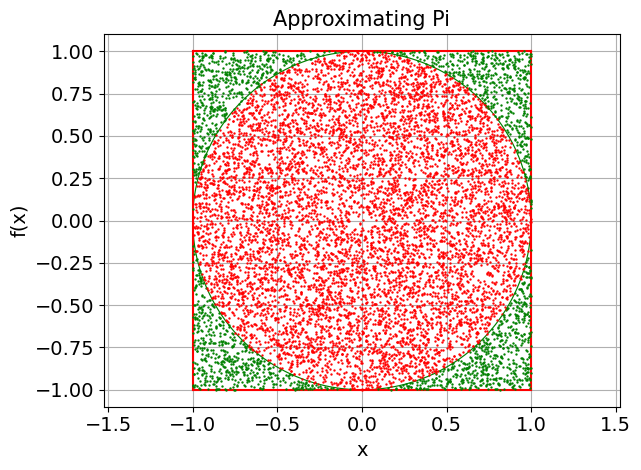

In [72]:
import numpy as np
import matplotlib.pyplot as plt
import random
def randomizer(u):
  radius = 1
  x = np.linspace(-1,1,1000)
  y = ((radius**2)-(x**2))**(1/2)
  z = -((radius**2)-(x**2))**(1/2)
  plt.plot(x,y,'g',linewidth=0.85)
  plt.plot(x,z,'g',linewidth=0.85)
  plt.plot([-1,1],[1,1],'r') 
  plt.plot([1,1],[1,-1],'r') 
  plt.plot([-1,-1],[-1,1],'r') 
  plt.plot([-1,1],[-1,-1],'r')
  i = 0
  n = 0
  l = 0
  a =  np.random.uniform(-1, 1)
  b =  np.random.uniform(-1, 1)
  while i<u:
    def func(k):
      plt.plot(a,b,'o',color=k,markersize=0.7)
    y1=((radius**2)-(a**2))**(1/2)
    if abs(b)<=abs(y1):
      n+=1
      func('red')
    else:
      l+=1
      func('green')
    a =  np.random.uniform(-1, 1)
    b =  np.random.uniform(-1, 1)
    i+=1
  pi = (n/(l+n))*4
  print(n,l,pi)
xlabel = plt.xlabel('x',fontsize=14) 
ylabel = plt.ylabel('f(x)', fontsize=14) 
title = plt.title('Approximating Pi',fontsize=15) 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
fig = plt.gcf() 
ax = plt.gca() 
ax.axis('equal') 
plt.tight_layout()
randomizer(10000)

We can make use of Monte Carlo methods to make sense of concepts in quantum mechanics, particularly in simulating the structure of a hydrogren atom. To see how, we must first delve into the mathematics that governs the physical shape of an orbital.

Let us begin with the time dependent Schrödinger's equation as used for non-relativistic particles.

$\hat{H}\Psi=E\Psi$

This can be rewritten as follows:

$[-\frac{h^2}{8\pi^2m_e}]\Psi(r,\theta,\phi)=E\Psi$

$-\frac{h^2}{8\pi^2m_e}[\frac{1}{r^2}\frac{\partial}{\partial r}r^2\frac{\partial\Psi}{\partial r}+\frac{1}{r^2sin\theta}\frac{\partial}{\partial\theta}sin\theta\frac{\partial\Psi}{\partial\theta}+\frac{1}{r^2sin^2\theta}\frac{\partial^2\Psi}{\partial\phi^2}]-\frac{Ze^2}{4\pi\epsilon_0 r}\Psi=E\Psi$

Note: Z is the atomic number, we use it to include Hydrogen like-ions such as $He^+$ and $H^{2+}$. 

After we seperate the variable, we can segregate two components: one angular and one radial.

$-\frac{h^2}{8\pi^2m_e}[\frac{1}{R}\frac{\partial}{\partial r}r^2\frac{\partial R}{\partial r}+\frac{1}{Y}\frac{1}{sin\theta}\frac{\partial}{\partial\theta}sin\theta\frac{\partial Y}{\partial\theta}+\frac{1}{Y}\frac{1}{sin^2\phi}\frac{\partial^2 Y}{\partial\phi^2}]-\frac{Ze^2}{4\pi\epsilon_0 r}\Psi-Er^2=0$

This allows us to write:

$\Psi(r,\theta,\phi)=R(r)Y(\theta,\phi)$

where $R(r)$ is the radial component and $Y(\theta,\phi)$ is the angular component.

The equation corresponding to the radial bit is: $-\frac{h^2}{8\pi^2m_e}\frac{1}{R}\frac{\partial}{\partial r}r^2\frac{\partial R}{\partial r}-\frac{Ze^2}{4\pi\epsilon_0 r}\Psi-Er^2=-\alpha$.

The equation corresponding to the angular bit is: $-\frac{h^2}{8\pi^2m_e}[\frac{1}{Y}\frac{1}{sin\theta}\frac{\partial}{\partial\theta}sin\theta\frac{\partial Y}{\partial\theta}+\frac{1}{Y}\frac{1}{sin^2\phi}\frac{\partial^2 Y}{\partial\phi^2}]=\alpha$

We are using a constant $\alpha$, which cancels out after the addition of the two components, giving us our original equation.

Let us analyze the angular component, $-\frac{h^2}{8\pi^2m_e}[\frac{1}{Y}\frac{1}{sin\theta}\frac{\partial}{\partial\theta}sin\theta\frac{\partial Y}{\partial\theta}+\frac{1}{Y}\frac{1}{sin^2\phi}\frac{\partial^2 Y}{\partial\phi^2}]=\alpha$. 

It can be written as: $-\frac{h^2}{8\pi^2m_er^2}[\frac{1}{sin\theta}\frac{\partial}{\partial\theta}sin\theta\frac{\partial Y}{\partial\theta}+\frac{1}{sin^2\phi}\frac{\partial^2 Y}{\partial\phi^2}]=\frac{\alpha}{r^2}Y$. 

This corresponds to the rigid rotor form of the Schrödinger equation, allowing us to evaluate this component as: $Y_{lm}(\theta,\phi)=N_{lm}P^m_l(\theta,\phi)e^{im\phi}$.

As $\frac{\alpha}{r^2}$ is equivalent to the energy E, we can say that $\alpha=r^2E$.

The energy of the system in a rigid rotor is $E_l=\frac{h^2}{8\pi^2m_er^2}l(l+1)$, and so $\alpha=\frac{h^2}{8\pi^2m_er^2}l(l+1).$

Taking this into account, we move on to the radial bit and rewrite it as $-\frac{h^2}{8\pi^2m_er^2}\frac{d}{dr}r^2\frac{dR}{dr}-\frac{Ze^2}{4\pi\epsilon_0}\frac{1}{r}R-ER=-\alpha\frac{R}{r^2}$ and the rearrange it to: $-\frac{h^2}{8\pi^2m_er^2}\frac{d}{dr}r^2\frac{dR}{dr}+\frac{h}{8\pi^2m_er^2}Rl(l+1)-\frac{Ze^2}{4\pi\epsilon_0}\frac{1}{r}R-ER=0$ 

When we take l as 0, we get the simplest case, which is: $-\frac{h^2}{8\pi^2m_er^2}\frac{d}{dr}r^2\frac{dR}{dr}-\frac{ze^2}{4\pi\epsilon_0}\frac{1}{r}R-ER=0$. 

Mathematically a constant c must equal to $\frac{Ze^2\pi m_e}{\epsilon_0h^2}$ in order to fit $R(r)$ of a general form $e^{-cr}$ and to satisfy Schrödinger's equation.

We denote the inverse of this constant, $\frac{\epsilon_0h^2}{Ze^2\pi m_e}$, as $a_0$ or the Bohr radius. With a similar logic, we can derive an equation for energy: $E=-\frac{c^2h^2}{8\pi^2m_e}=-\frac{h^2}{8\pi^2m_e}\frac{Z^2}{a_0^2}$.

However, to generalize the equation for every value of l, we write $R_{nl}(r)=N(\frac{2Zr}{na_0})L_{n-l-1}^{2l+1}(\frac{2Zr}{na_0})$, where $L_{n-l-1}^{2l+1}$ are a set of Laguerre polynomials. These polynomials are used because they sastisfy Schrödinger's equation.

In summary, $\Psi(r,\theta,\phi)=R_{nl}(r)Y_{lm}(\theta,\phi)$, where $Y_{lm}(\theta,\phi)=N_{lm}P^m_l(\theta,\phi)e^{im\phi}$ and $R_{nl}(r)=N(\frac{2Zr}{na_0})L_{n-l-1}^{2l+1}(\frac{2Zr}{na_0})$.

The probability density of the system is given by $|\Psi_{nlm}(r,\theta,\phi)|^2=|R_{nl}(r)|^2|Y_{lm}(\theta,\phi)|^2$.

It is important to note that n is the principial quantum number, l is the angular momentum quantum number and m is the magnetic quantum number. n varies from {1,2...}, while l varies from {0,1...n-1} and m varies from {-l...l}.

In the context of Chemistry $n=1, l=0, m=0$ is interpreted as a $1s$ orbital. Another example includes $n=2, l=1, m=0$ which is a $2p_z$ orbital.

How do we model an orbital in Python? Similar to the Pi example from earlier, we do the following:
Set ranges for the quantum numbers n,l&m. Create a 'box' and set dimensions for the box Compute the upper bounds of $|\Psi_{nlm}(r,\theta,\phi)|^2$. Introduce the number of points to add. Create a counter. Generate random x/2, y/2 and z/2 values. For each set of generated values, evaluate the spherical coordinates. Generate a w in the range of the upper limit. If $w<|\Psi_{nlm}(r,\theta,\phi)|^2$, add the coordinates to a list and add 1 to counter. Repeat the function until the limit is reached.

The same as before, we ensure that we avoid pseudo-random numbers, so we get accurate results. 

Let us start with n = 1, l = 0, m = 0. 

$Y_{lm}(\theta,\phi)=\sqrt{\frac{(2l+1)(l-|m|)!}{4\pi(l+|m|)!}}P_l^{|m|}(cos(\theta))e^{im\phi}$

$P_l^{|m|}$, the Legendre polynomial, reduces to 1. Overall, $Y_{lm}(\theta,\phi)=\sqrt{\frac{1}{4\pi}}$.

Letting $\rho$ denote $\frac{2Zr}{na_0}$, $R_{nl}(r)=\sqrt{(\frac{2Z}{na_0})^3\frac{(n-l-1)!}{2n(n+l)!}}e^{-\rho/2}\rho^lL^{2l+1}_{n+l-1}(\rho)$.

In [25]:
import scipy 
n=1
l=0
m=0
print(scipy.special.laguerre(n-l-1,2*l+1))

 
1


$R_{nl}$ simplifies to $\frac{2}{a_0^{3/2}}e^{-\frac{r}{a_0}}$.

$\Psi(r,\theta,\phi)=\frac{1}{\sqrt{\pi}a_0^{3/2}}e^{-\frac{r}{a_o}}$, $|\Psi(r,\theta,\phi)|^2=\frac{1}{\pi a_0^{3}}e^{-\frac{2r}{a_o}}$

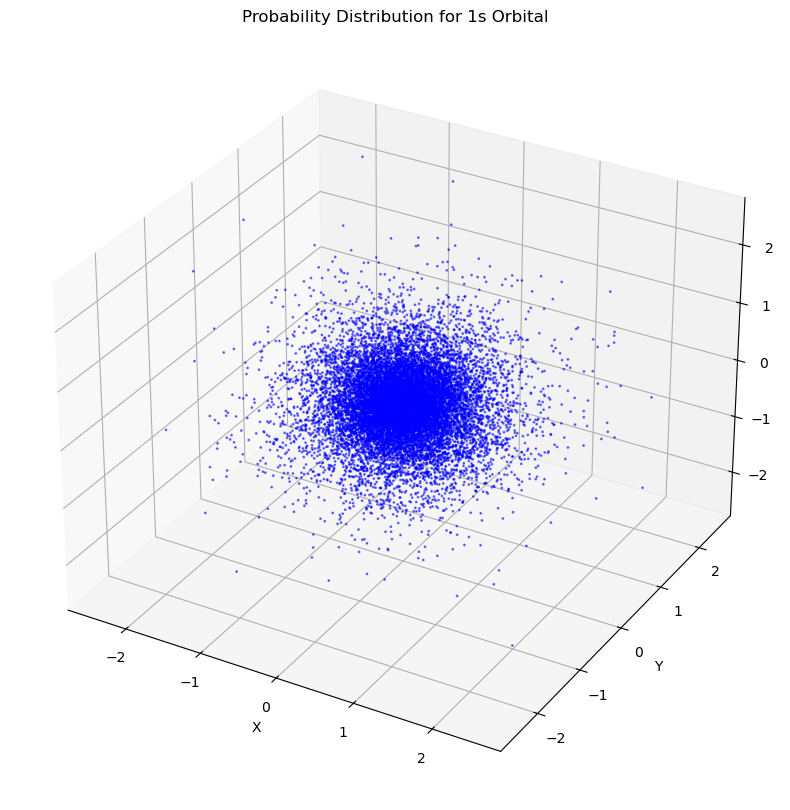

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import random
a0 = 0.529177 #Bohr radius in Angstroms
max = 1/(np.pi*(a0**3)) #Upper limit 
point_list = [] #List to store points in the range.
delta_x, delta_y, delta_z = 5, 5, 5 #Dimensions of the box
def cartesian_to_spherical(x, y, z): #Function to convert from cartesian to spherical coordinates.
    r = np.sqrt(x**2 + y**2 + z**2)
    return r    
def run(u):
    i = 0 #Counter
    while i<u:
      x = np.random.uniform(-delta_x/2, delta_x/2) #Randomly generated x-value.
      y = np.random.uniform(-delta_y/2,delta_y/2) #Randomly generated y-value.
      z = np.random.uniform(-delta_z/2,delta_z/2) #Randomly generated z-value.
      w = np.random.uniform(0,max) #Randomly generated value in range of upper limit.
      r = cartesian_to_spherical(x,y,z) #Setting the returned r value to a variable.
      psi2 = (1/(np.pi*(a0**3)))*np.e**((-2*r)/a0) #The psi^2 
      if w<=psi2:
        point_list.append((x,y,z)) #Adding the randomly generated coordinates to the list if they fall in range.
        i+=1
run(15000) #15000 points sampled.
point_list = np.array(point_list) #Converting the list to a numpy array.
fig = plt.figure(figsize=(10, 10)) #Dimensions of plot.
ax = fig.add_subplot(111, projection='3d') #A 3D subplot with 1 row, 1 column in the first position.
ax.scatter(point_list[:, 0], point_list[:, 1], point_list[:, 2], s=1, c='blue', alpha=0.5) #Extracting coordinates from the array and plotting.
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title(f"Probability Distribution for 1s Orbital")
plt.show()

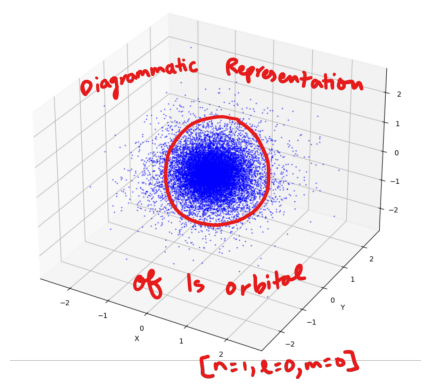

In [118]:
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO

url = "https://github.com/TP247/RamanData/blob/main/1s.png?raw=true" 
response = requests.get(url)
if response.status_code == 200:
    img = Image.open(BytesIO(response.content))
    plt.imshow(img)
    plt.axis('off')  
    plt.show()

We will now consider n = 2, l = 0, m = 0.

$Y_{lm}(\theta,\phi)=\sqrt{\frac{(2l+1)(l-|m|)!}{4\pi(l+|m|)!}}P_l^{|m|}(cos(\theta))e^{im\phi}$

$Y_{00}(\theta,\phi)=\sqrt{\frac{1}{4\pi}}$

$R_{nl}(r)=\sqrt{(\frac{2Z}{na_0})^3\frac{(n-l-1)!}{2n(n+l)!}}e^{-\rho/2}\rho^lL^{2l+1}_{n+l-1}(\rho)$

In [100]:
import scipy 
n=2
l=0
m=0
print(scipy.special.laguerre(n-l-1,2*l+1))

 
1 x - 1


$R_{20} = (\frac{1}{\sqrt{2a_0^3}})(1-\frac{r}{a_0})e^{-\frac{r}{2a_0}}$

$\Psi(r,\theta,\phi)= (\frac{1}{\sqrt{2a_0^3}})(1-\frac{r}{a_0})e^{-\frac{r}{2a_0}}\sqrt{\frac{1}{4\pi}}$

$|\Psi(r,\theta,\phi)|$ can be evaluated in the code.

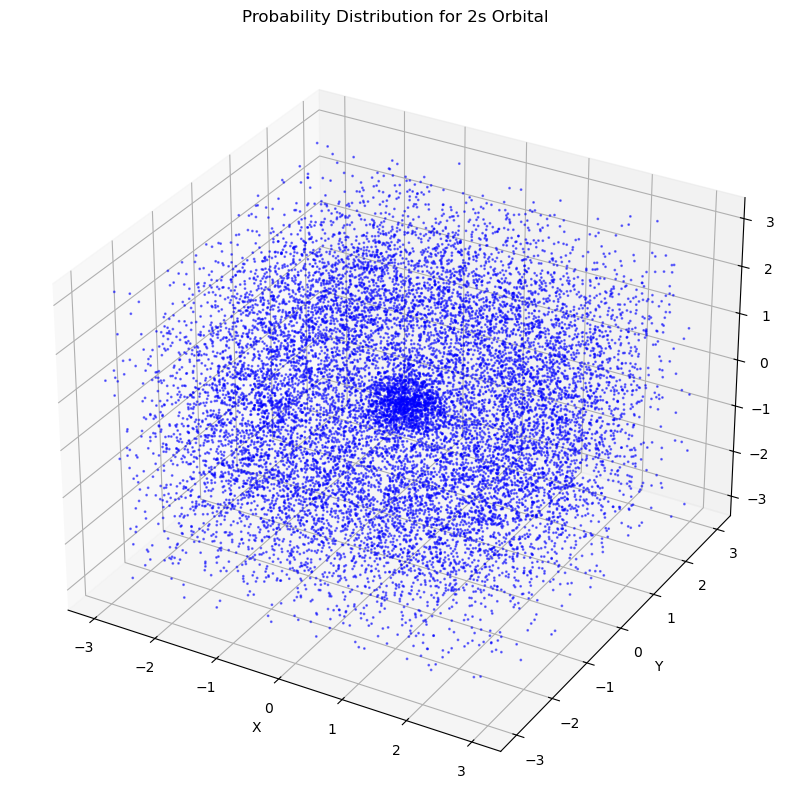

In [107]:
import numpy as np
import matplotlib.pyplot as plt
import random
a0 = 0.529177 #Bohr radius in Angstroms
max = 1/(np.pi*(a0**3)) #Upper limit 
point_list = [] #List to store points in the range.
delta_x, delta_y, delta_z = 6, 6, 6 #Dimensions of the box
def cartesian_to_spherical(x, y, z): #Function to convert from cartesian to spherical coordinates.
    r = np.sqrt(x**2 + y**2 + z**2)
    return r    
def run(u):
    i = 0 #Counter
    while i<u:
      x = np.random.uniform(-delta_x/2, delta_x/2) #Randomly generated x-value.
      y = np.random.uniform(-delta_y/2,delta_y/2) #Randomly generated y-value.
      z = np.random.uniform(-delta_z/2,delta_z/2) #Randomly generated z-value.
      w = np.random.uniform(0,max) #Randomly generated value in range of upper limit.
      r = cartesian_to_spherical(x,y,z) #Setting the returned r value to a variable.
      psi = (1 / np.sqrt(8 * np.pi * a0**3)) * (2 - r / a0) * np.exp(-r / (2 * a0))
      psi2 = psi**2#The psi^2 
      if w<=psi2:
        point_list.append((x,y,z)) #Adding the randomly generated coordinates to the list if they fall in range.
        i+=1
run(15000) #15000 points sampled.
point_list = np.array(point_list) #Converting the list to a numpy array.
fig = plt.figure(figsize=(10, 10)) #Dimensions of plot.
ax = fig.add_subplot(111, projection='3d') #A 3D subplot with 1 row, 1 column in the first position.
ax.scatter(point_list[:, 0], point_list[:, 1], point_list[:, 2], s=1, c='blue', alpha=0.5) #Extracting coordinates from the array and plotting.
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title(f"Probability Distribution for 2s Orbital")
plt.show()

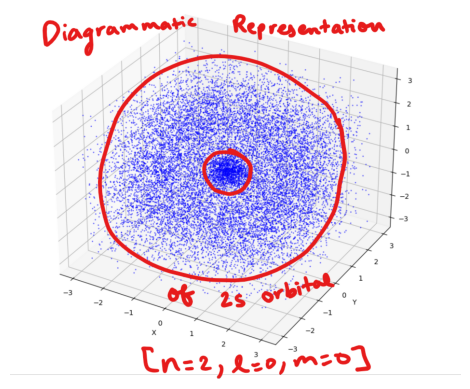

In [120]:
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO

url = "https://github.com/TP247/RamanData/blob/main/2s.png?raw=true" 
response = requests.get(url)
if response.status_code == 200:
    img = Image.open(BytesIO(response.content))
    plt.imshow(img)
    plt.axis('off')  
    plt.show()

There exists a spherical node, an area where electrons can not reside.

Now for n = 2, l = 1, m = 0.

$Y_{lm}(\theta,\phi)=\sqrt{\frac{(2l+1)(l-|m|)!}{4\pi(l+|m|)!}}P_l^{|m|}(cos(\theta))e^{im\phi}$

$Y_{10}(\theta,\phi) = \sqrt{\frac{3}{4\pi}}cos(\theta)$

$R_{nl}(r)=\sqrt{(\frac{2Z}{na_0})^3\frac{(n-l-1)!}{2n(n+l)!}}e^{-\rho/2}\rho^lL^{2l+1}_{n+l-1}(\rho)$

In [ ]:
import scipy 
n=2
l=1
m=0
print(scipy.special.laguerre(n-l-1,2*l+1))

$R_{21}(r) = \sqrt{\frac{1}{24a_0^3}}\frac{r}{a_0}e^{-\frac{r}{2a_0}}$

$\Psi(r,\theta,\phi)=\sqrt{\frac{1}{24a_0^3}}\frac{r}{a_0}e^{-\frac{r}{2a_0}}\sqrt{\frac{3}{4\pi}}cos(\theta)$

We will evaluate $|\Psi(r,\theta,\phi)|^2$ in the code.

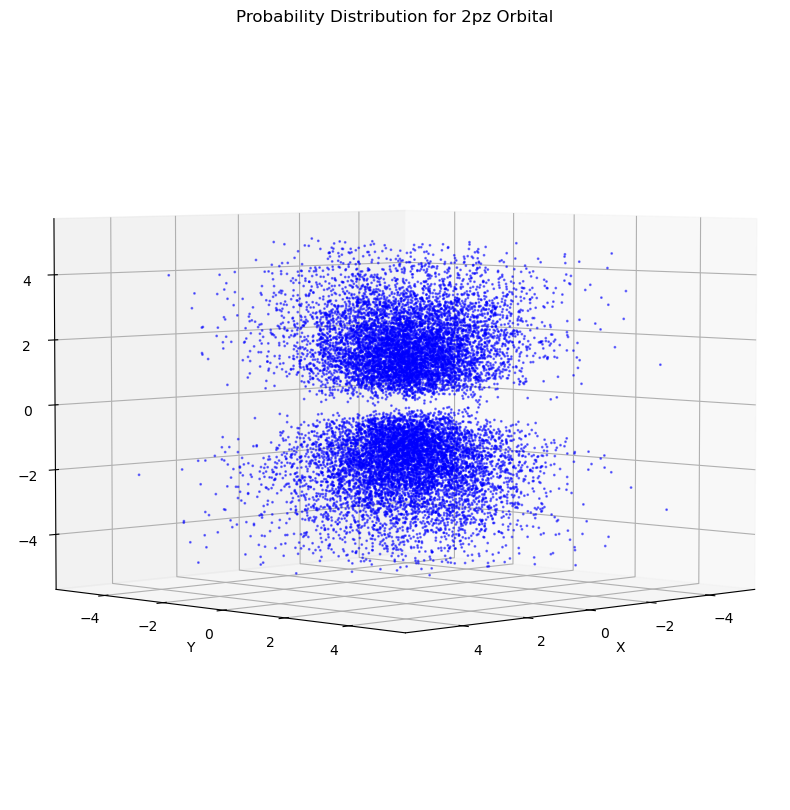

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import random
a0 = 0.529177 #Bohr radius in Angstroms
max = 1/(24*np.pi*(a0**3)) #Upper limit 
point_list = [] #List to store points in the range.
delta_x, delta_y, delta_z = 10, 10, 10 #Dimensions of the box
def cartesian_to_spherical(x, y, z): #Function to convert from cartesian to spherical coordinates.
    r = np.sqrt(x**2 + y**2 + z**2)
    theta = np.arccos(z/r) 
    return r,theta    
def run(u):
    i = 0 #Counter
    while i<u:
      x = np.random.uniform(-delta_x/2, delta_x/2) #Randomly generated x-value.
      y = np.random.uniform(-delta_y/2,delta_y/2) #Randomly generated y-value.
      z = np.random.uniform(-delta_z/2,delta_z/2) #Randomly generated z-value.
      w = np.random.uniform(0,max) #Randomly generated value in range of upper limit.
      r,theta = cartesian_to_spherical(x,y,z) #Setting the returned r and theta value to a variable.
      psi = (1 / np.sqrt(24 * a0**3)) * (r / a0) * np.exp(-r / (2 * a0)) * np.sqrt(3 / (4 * np.pi)) * np.cos(theta) #Psi 
      psi2 = psi**2 #Psi^2
      if w<=psi2:
        point_list.append((x,y,z)) #Adding the randomly generated coordinates to the list if they fall in range.
        i+=1
run(15000) #15000 points sampled.
point_list = np.array(point_list) #Converting the list to a numpy array.
fig = plt.figure(figsize=(10, 10)) #Dimensions of plot.
ax = fig.add_subplot(111, projection='3d') #A 3D subplot with 1 row, 1 column in the first position.
ax.scatter(point_list[:, 0], point_list[:, 1], point_list[:, 2], s=1, c='blue', alpha=0.5) #Extracting coordinates from the array and plotting.
ax.view_init(elev=4, azim=45)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title(f"Probability Distribution for 2pz Orbital")
plt.show()

The image below show the typical depiction of the 2pz orbital. It is important to note that the node is a plane where the probability of finding an electron is 0.  

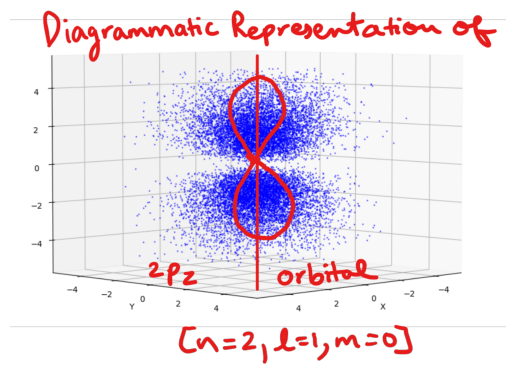

In [2]:
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO

url = "https://github.com/TP247/RamanData/blob/main/2pz_orbital.png?raw=true" 
response = requests.get(url)
if response.status_code == 200:
    img = Image.open(BytesIO(response.content))
    plt.imshow(img)
    plt.axis('off')  
    plt.show()

In [ ]:
Lastly, we will consider  n = 3, l = 2, m = 0.

$Y_{lm}(\theta,\phi)=\sqrt{\frac{(2l+1)(l-|m|)!}{4\pi(l+|m|)!}}P_l^{|m|}(cos(\theta))e^{im\phi}$

$Y_{20}(\theta,\phi) = \sqrt{\frac{5}{4\pi}}(3cos^2\theta-1)$

$R_{nl}(r)=\sqrt{(\frac{2Z}{na_0})^3\frac{(n-l-1)!}{2n(n+l)!}}e^{-\rho/2}\rho^lL^{2l+1}_{n+l-1}(\rho)$

In [ ]:
import scipy 
n=3
l=2
m=0
print(scipy.special.laguerre(n-l-1,2*l+1))

$R_{32}(r) = \frac{1}{36a^{\frac{3}{2}}}(\frac{2r}{3a_0})^2 e^{-\frac{r}{3a_0}}$

$\Psi(r,\theta,\phi)=\frac{1}{36}\sqrt{\frac{2}{\pi}}(\frac{1}{a_0})^{\frac{3}{2}}(\frac{2r}{3a_0})^2e^{-\frac{r}{3a_0}}(3cos^2\theta-1)$


Like before, $|\Psi(r,\theta,\phi)|^2$ will be considered in the code.

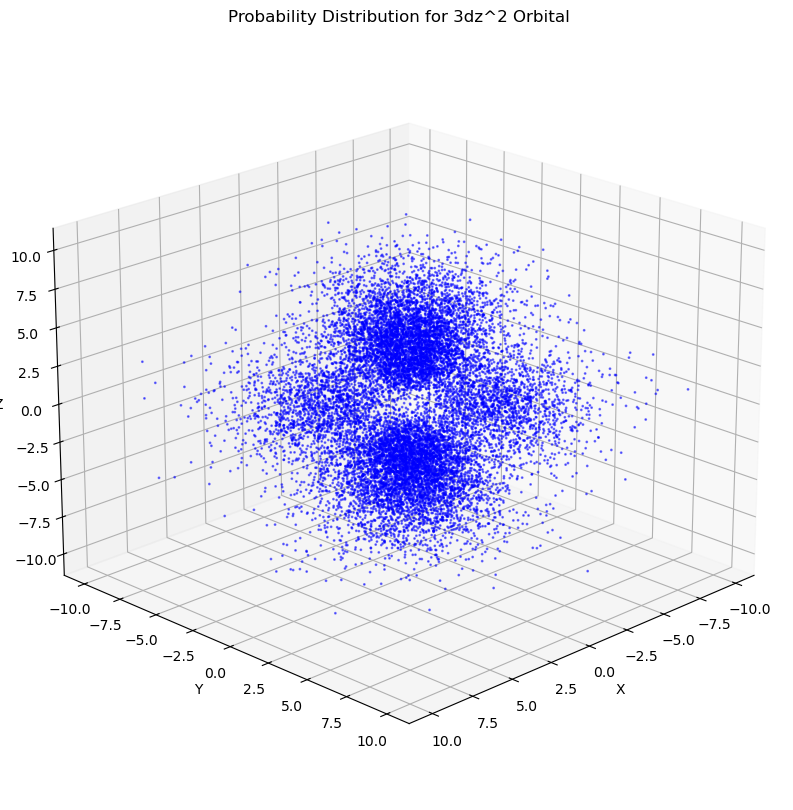

In [78]:
import numpy as np
import matplotlib.pyplot as plt
import random
a0 = 0.529177 #Bohr radius in Angstroms
max = 1 / (36 * np.pi * a0**3) #Upper limit 
point_list = [] #List to store points in the range.
delta_x, delta_y, delta_z = 20, 20, 20 #Dimensions of the box
def cartesian_to_spherical(x, y, z): #Function to convert from cartesian to spherical coordinates.
    r = np.sqrt(x**2 + y**2 + z**2)
    theta = np.arccos(z/r) 
    return r,theta    
def run(u):
    i = 0 #Counter
    while i<u:
      x = np.random.uniform(-delta_x/2, delta_x/2) #Randomly generated x-value.
      y = np.random.uniform(-delta_y/2,delta_y/2) #Randomly generated y-value.
      z = np.random.uniform(-delta_z/2,delta_z/2) #Randomly generated z-value.
      w = np.random.uniform(0,max) #Randomly generated value in range of upper limit.
      r,theta = cartesian_to_spherical(x,y,z) #Setting the returned r and theta value to a variable.
      psi = (1 / 36) * (1 / a0)**(3/2) * (2 * r / (3 * a0))**2 * np.exp(-r / (3 * a0))*np.sqrt(2 / np.pi) * (3 * np.cos(theta)**2 - 1)  #Psi 
      psi2 = psi**2 #Psi^2
      if w<=psi2:
        point_list.append((x,y,z)) #Adding the randomly generated coordinates to the list if they fall in range.
        i+=1
run(15000) #15000 points sampled.
point_list = np.array(point_list) #Converting the list to a numpy array.
fig = plt.figure(figsize=(10, 10)) #Dimensions of plot.
ax = fig.add_subplot(111, projection='3d') #A 3D subplot with 1 row, 1 column in the first position.
ax.scatter(point_list[:, 0], point_list[:, 1], point_list[:, 2], s=1, c='blue', alpha=0.5) #Extracting coordinates from the array and plotting.
ax.view_init(elev=21, azim=45)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title(f"Probability Distribution for 3dz^2 Orbital")
plt.show()

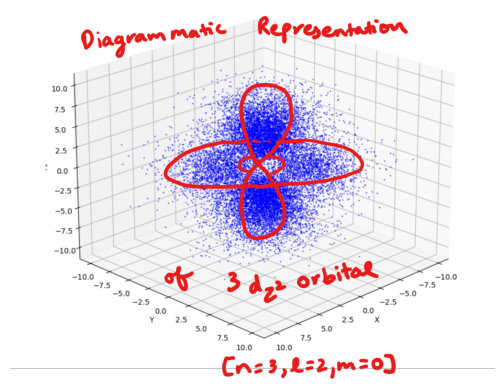

In [86]:
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO

url = "https://github.com/TP247/RamanData/blob/main/3dz.png?raw=true" 
response = requests.get(url)
if response.status_code == 200:
    img = Image.open(BytesIO(response.content))
    plt.imshow(img)
    plt.axis('off')  
    plt.show()